In [1]:
#Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
#set display 
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

In [3]:
#import datasets
df_listing=pd.read_csv("listings.csv")
df_calendar=pd.read_csv("calendar.csv")

#make copies of each dataframe
df_listing_ori=df_listing.copy()
df_calendar_ori=df_calendar.copy()

In [4]:
#Pricing column has Nan values
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
#drop rows where the price is Nan
df_calendar=df_calendar.dropna(subset=["price"], axis=0)
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [6]:
df_calendar['month'] = df_calendar.apply(lambda row: int(row['date'].split('-')[1]),axis=1)
df_calendar['year'] = df_calendar.apply(lambda row: int(row['date'].split('-')[0]),axis=1)
df_calendar.head()

listing_id        date available   price  month  year
0       241032  2016-01-04         t  $85.00      1  2016
1       241032  2016-01-05         t  $85.00      1  2016
9       241032  2016-01-13         t  $85.00      1  2016
10      241032  2016-01-14         t  $85.00      1  2016
14      241032  2016-01-18         t  $85.00      1  2016

In [7]:
df_calendar.drop(["date"],inplace=True,axis=1),

df_calendar.head()

listing_id available   price  month  year
0       241032         t  $85.00      1  2016
1       241032         t  $85.00      1  2016
9       241032         t  $85.00      1  2016
10      241032         t  $85.00      1  2016
14      241032         t  $85.00      1  2016

In [8]:
df_calendar.shape

(934542, 5)

In [9]:
df_calendar=df_calendar.drop_duplicates()

In [10]:
df_calendar.shape

(74520, 5)

In [11]:
df_calendar.head(20)

listing_id available    price  month  year
0        241032         t   $85.00      1  2016
28       241032         t   $85.00      2  2016
57       241032         t   $85.00      3  2016
88       241032         t   $85.00      4  2016
118      241032         t   $85.00      5  2016
149      241032         t   $85.00      6  2016
179      241032         t   $85.00      7  2016
210      241032         t   $85.00      8  2016
241      241032         t   $85.00      9  2016
271      241032         t   $85.00     10  2016
302      241032         t   $85.00     11  2016
332      241032         t   $85.00     12  2016
363      241032         t   $85.00      1  2017
365      953595         t  $125.00      1  2016
452      953595         t  $154.00      3  2016
453      953595         t  $164.00      4  2016
454      953595         t  $165.00      4  2016
455      953595         t  $150.00      4  2016
456      953595         t  $145.00      4  2016
457      953595         t  $144.00      4  2016

In [12]:
df_calendar=df_calendar.dropna(subset=["price"], axis=0)
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74520 entries, 0 to 1393205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  74520 non-null  int64 
 1   available   74520 non-null  object
 2   price       74520 non-null  object
 3   month       74520 non-null  int64 
 4   year        74520 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.4+ MB


In [13]:
#rename the 'id' column in listing.csv to 'listing_id'
df_listing = df_listing.rename(index=str, columns = {'id':'listing_id'})

In [14]:
df_listing.head(2)

listing_id                          listing_url       scrape_id  \
0      241032  https://www.airbnb.com/rooms/241032  20160104002432   
1      953595  https://www.airbnb.com/rooms/953595  20160104002432   

  last_scraped                                name  \
0   2016-01-04        Stylish Queen Anne Apartment   
1   2016-01-04  Bright & Airy Queen Anne Apartment   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                      xl_picture_url  host_id  \
0                                                NaN   956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...  5177328   

                                    host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1  https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...         Queen Anne   
1  https://a0.muscache.com/ac/users/5177328/profi...         Queen Anne   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0               ['email', 'phone', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'linkedin', 're...                    t   

  host_identity_verified                                             street  \
0                      t      Gilman Dr W, Seattle, WA 98119, United States   
1                      t  7th Avenue West, Seattle, WA 98119, United States   

  neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     c

In [15]:
df_listing["host_acceptance_rate"].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In [16]:
df_listing_areas=df_listing[["neighbourhood","neighbourhood_cleansed","neighbourhood_group_cleansed"]].drop_duplicates()
df_listing_areas

neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed
0       Queen Anne        West Queen Anne                   Queen Anne
12             NaN        West Queen Anne                   Queen Anne
65             NaN                  Adams                      Ballard
66         Ballard                  Adams                      Ballard
135        Ballard          West Woodland                      Ballard
...            ...                    ...                          ...
3652   Bitter Lake              Broadview          Other neighborhoods
3656       Fremont                Fremont          Other neighborhoods
3662           NaN                Fremont          Other neighborhoods
3674   Wallingford                Fremont          Other neighborhoods
3743       Ballard                Fremont          Other neighborhoods

[270 rows x 3 columns]

In [17]:
df_listing["host_has_profile_pic"].value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

In [18]:
df_listing["host_identity_verified"].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

#Notes

host_id - cat
host_since - covert to date
host_response_time - cat
host_response_rate - covert to float
host_acceptance_rate - covert to float
host_is_superhost - t/f
host_total_listings_count - float
host_verifications - concat
host_has_profile_pic - t/f
host_identity_verified - t/f
neighbourhood - explore futher
neighbourhood_cleansed - explore futher
neighbourhood_group_cleansed - explore futher
property_type
room_type
accommodates',
bathrooms
bedrooms
beds
bed_type -
amenities - concat
availability_30 - float
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
cancellation_policy
available
price_y
date

In [19]:
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name','summary',
                   'space', 'description', 'experiences_offered','neighborhood_overview','notes',
                   'transit', 'thumbnail_url','medium_url', 'picture_url', 'xl_picture_url',
                   'host_url','host_name','host_location','host_about','host_acceptance_rate',
                   'host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count',
                   'street','city','state', 'zipcode', 'market','smart_location','country_code','country',
                   'latitude','longitude','is_location_exact','square_feet','weekly_price',
                   'monthly_price','security_deposit','cleaning_fee','guests_included','extra_people',
                   'minimum_nights','maximum_nights', 'calendar_updated', 'has_availability',
                   'calendar_last_scraped','first_review','last_review','requires_license','license',
                   'jurisdiction_names','instant_bookable','require_guest_profile_picture',
                   'require_guest_phone_verification','calculated_host_listings_count','reviews_per_month',
                  'availability_30','availability_60','availability_90','availability_365',"host_id",
                   "host_since","host_response_time","host_response_rate",
                   "host_is_superhost","host_total_listings_count","host_verifications",
                   "review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
                   "review_scores_communication","review_scores_location","review_scores_value",
                   "neighbourhood","neighbourhood_cleansed","host_has_profile_pic"]

In [20]:
for col in columns_to_drop:
    df_listing.drop(col,inplace=True,axis=1)

In [21]:

#now we can merge our datasets based on listing_id
df = pd.merge(df_listing, df_calendar, on='listing_id')
df.head()

listing_id host_identity_verified neighbourhood_group_cleansed  \
0      241032                      t                   Queen Anne   
1      241032                      t                   Queen Anne   
2      241032                      t                   Queen Anne   
3      241032                      t                   Queen Anne   
4      241032                      t                   Queen Anne   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   
2     Apartment  Entire home/apt             4        1.0       1.0   1.0   
3     Apartment  Entire home/apt             4        1.0       1.0   1.0   
4     Apartment  Entire home/apt             4        1.0       1.0   1.0   

   bed_type                                          amenities price_x  \
0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00   
1  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00   
2  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00   
3  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00   
4  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...  $85.00   

   number_of_reviews  review_scores_rating cancellation_policy available  \
0                207                  95.0            moderate         t   
1                207                  95.0            moderate         t   
2                207                  95.0            moderate         t   
3                207                  95.0            moderate         t   
4                207                  95.0            moderate         t   

  price_y  month  year  
0  $85.00      1  2016  
1  $85.00      2  2016  
2  $85.00      3  2016  
3  $85.00      4  2016  
4  $85.00      5  2016

In [22]:
#df.drop("listing_id",inplace=True,axis=1)
df.drop("price_x",inplace=True,axis=1)
df.drop("available",inplace=True,axis=1)
df.drop("year",inplace=True,axis=1)
df.head(2)

listing_id host_identity_verified neighbourhood_group_cleansed  \
0      241032                      t                   Queen Anne   
1      241032                      t                   Queen Anne   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   

   bed_type                                          amenities  \
0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   number_of_reviews  review_scores_rating cancellation_policy price_y  month  
0                207                  95.0            moderate  $85.00      1  
1                207                  95.0            moderate  $85.00      2

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74520 entries, 0 to 74519
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    74520 non-null  int64  
 1   host_identity_verified        74512 non-null  object 
 2   neighbourhood_group_cleansed  74520 non-null  object 
 3   property_type                 74508 non-null  object 
 4   room_type                     74520 non-null  object 
 5   accommodates                  74520 non-null  int64  
 6   bathrooms                     74262 non-null  float64
 7   bedrooms                      74398 non-null  float64
 8   beds                          74507 non-null  float64
 9   bed_type                      74520 non-null  object 
 10  amenities                     74520 non-null  object 
 11  number_of_reviews             74520 non-null  int64  
 12  review_scores_rating          66265 non-null  float64
 13  c

In [24]:
#cat_cols=["host_id"]

#date_cols=["host_since","date"]
#date_cols=["date"]

#perc_cols=["host_response_rate"]

#concat_cols=["host_verifications","amenities"]
concat_cols=["amenities"]

dollar_cols=["price_y"]

bool_cols=["host_is_superhost","host_has_profile_pic","host_identity_verified"]

def cat_data(df,cols):
    '''
    input: a data frame and a list of columns
    output: a dataframe where the list of columns were converted to string type ie object
    '''
    for col in cols:
        df[col]=df[col].astype(str)

cat_data(df,cat_cols)
df[cat_cols].info()

def date_str_to_date(df,cols):
    '''
    input: a data frame and a list of columns
    output: a dataframe where the list of columns were converted to dates
    '''
    for col in cols:
        #d=pd.to_datetime(df[col])
        #df=pd.concat([df.drop(col,axis=1),d],axis=1)
        df[col] = pd.to_datetime(df[col])
    return df
 
date_str_to_date(df,date_cols)
df[date_cols].info()

def perc_str_to_float(df,perc_cols):
    for col in perc_cols:
        try:df[col]=df[col].str.replace("[%, ]", "")
        except:continue
        df[col]=df[col].astype("float")
        df[col] = df[col].div(100)
        
perc_str_to_float(df,perc_cols)
df[perc_cols].head()

In [25]:
df[dollar_cols].head()

price_y
0  $85.00
1  $85.00
2  $85.00
3  $85.00
4  $85.00

In [26]:
def dollartofloat(df,dollar_cols):
    for col in dollar_cols:
            df[col]=df[col].str.replace("[$, ]", "")  
            df[col]=df[col].astype("float")
            
dollartofloat(df,dollar_cols)
df[dollar_cols].head()

price_y
0     85.0
1     85.0
2     85.0
3     85.0
4     85.0

def tf_to_bool(df,bool_cols,dic):

        for col in bool_cols:
            try:df[col]=df[col].replace(dic).astype("bool")
            except: continue
dic={'t': True, 'f': False}

tf_to_bool(df,bool_cols,dic)
df[bool_cols].head()

In [27]:
df.head()

listing_id host_identity_verified neighbourhood_group_cleansed  \
0      241032                      t                   Queen Anne   
1      241032                      t                   Queen Anne   
2      241032                      t                   Queen Anne   
3      241032                      t                   Queen Anne   
4      241032                      t                   Queen Anne   

  property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1     Apartment  Entire home/apt             4        1.0       1.0   1.0   
2     Apartment  Entire home/apt             4        1.0       1.0   1.0   
3     Apartment  Entire home/apt             4        1.0       1.0   1.0   
4     Apartment  Entire home/apt             4        1.0       1.0   1.0   

   bed_type                                          amenities  \
0  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
2  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   number_of_reviews  review_scores_rating cancellation_policy  price_y  month  
0                207                  95.0            moderate     85.0      1  
1                207                  95.0            moderate     85.0      2  
2                207                  95.0            moderate     85.0      3  
3                207                  95.0            moderate     85.0      4  
4                207                  95.0            moderate     85.0      5

In [28]:
def display_nans(df,cut_off,display=True):
    '''
    INPUT : Dataframe
            cut_off decimal to remove columns with less than this value of Nan
    
    OUTPUT: Graph with % of nan values in each column

    '''
    
    global df_nan
    df_nan = pd.DataFrame(df.isna().sum() / df.shape[0]).reset_index()
    df_nan.rename(columns={'index':'column',0:'na_per'},inplace=True)
    
    # sort df by Count column
    df_nan = df_nan.sort_values(['na_per'],ascending=False).reset_index(drop=True)
    
    # Remove fll columns
    df_nan=df_nan[df_nan["na_per"]>cut_off]
    
    if display ==True:
        base_color = sns.color_palette()[0]
        plt.figure(figsize=(16,16))
        plt.title('Percentage of missing values by column')
        sns.barplot(data=df_nan,y='column', x='na_per', color=base_color)
    
    return df_nan

column    na_per
0    review_scores_rating  1.11e-01
1               bathrooms  3.46e-03
2                bedrooms  1.64e-03
3                    beds  1.74e-04
4           property_type  1.61e-04
5  host_identity_verified  1.07e-04

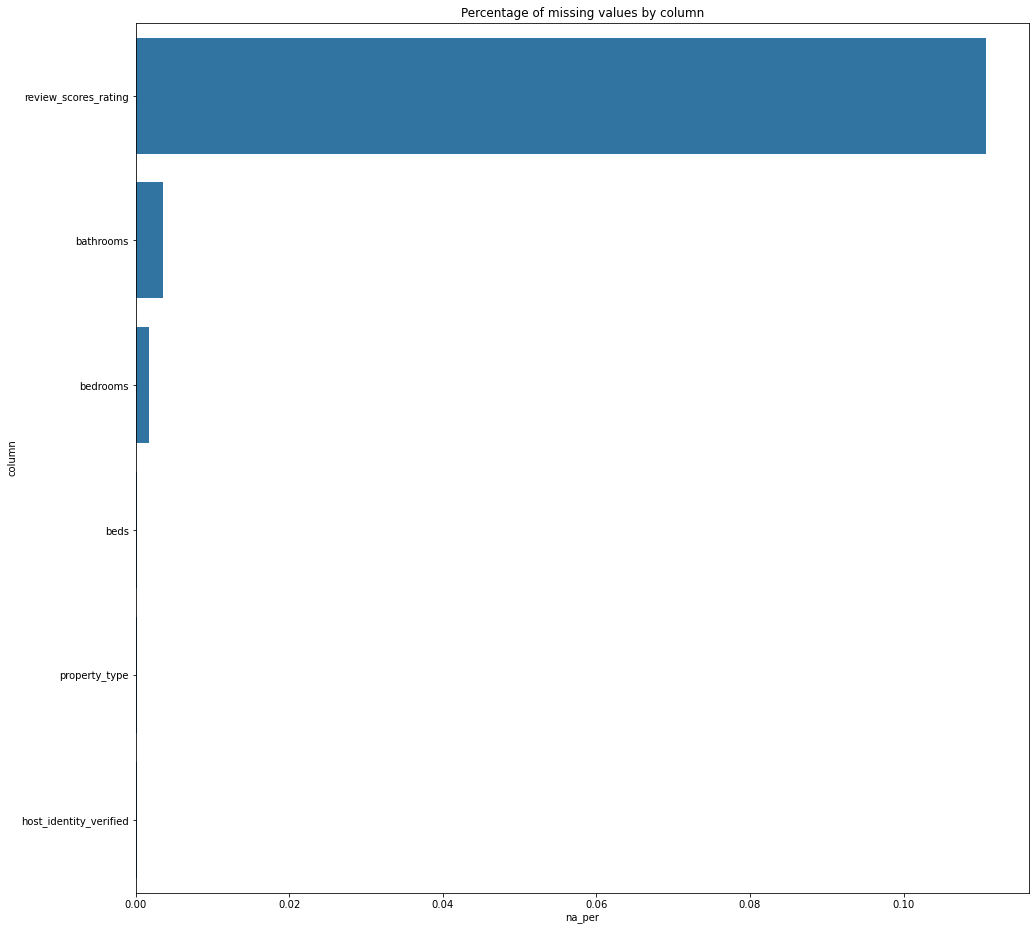

In [29]:
display_nans(df,0)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

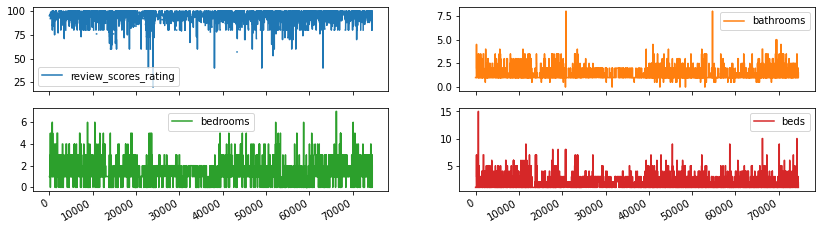

In [30]:
df[df_nan["column"]].plot(subplots=True, layout=(7,2),figsize=(14, 14))


In [31]:
df["bathrooms"].median()

1.0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74520 entries, 0 to 74519
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    74520 non-null  int64  
 1   host_identity_verified        74512 non-null  object 
 2   neighbourhood_group_cleansed  74520 non-null  object 
 3   property_type                 74508 non-null  object 
 4   room_type                     74520 non-null  object 
 5   accommodates                  74520 non-null  int64  
 6   bathrooms                     74262 non-null  float64
 7   bedrooms                      74398 non-null  float64
 8   beds                          74507 non-null  float64
 9   bed_type                      74520 non-null  object 
 10  amenities                     74520 non-null  object 
 11  number_of_reviews             74520 non-null  int64  
 12  review_scores_rating          66265 non-null  float64
 13  c

In [33]:
def split_cols(df,concat_cols,chars):
    '''
    input:
        Dataframe
        List of columns that you wish to clean and get dummies for
        list of characters you wish to remove
    output:
        1 - ",' characters are removed
        2 - charcters in chars string are removed
        3 - Original column is dropped and dummie columns are concatenated with prefix of columns name
    
    '''
    for col in concat_cols:
        df[col] = df[col].str.replace('"', "")
        df[col] = df[col].str.replace("'", "")
        for c in chars:
            df[col] = df[col].str.replace(c, "")
        df=pd.concat([df.drop(col, axis=1), df[col].str.get_dummies(sep=",").add_prefix(col+'_').astype(np.int8)], axis=1)
    return df    

chars = " [{}]"

df=split_cols(df,concat_cols,chars)


In [34]:
df_amen=df[df.columns[pd.Series(df.columns).str.startswith('amenities_')]]

In [35]:
df_amen.shape[0]

74520

(df_amen.sum()/df_amen.shape[0]*100)

In [36]:
def cat_onehot(df,method="median"):
        global cat_df
        cat_df = df.select_dtypes(include=['object'])
        cat_cols = cat_df.columns

        df_cat=df.copy()

        for col in  cat_cols:
            df_cat = pd.concat([df_cat.drop(col, axis=1), pd.get_dummies(df_cat[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True).astype(np.int8)], axis=1)
        
        if method=="median":
            # median function
            fill_med = lambda col: col.fillna(col.median())
            # Fill the median
            df_cat = df_cat.apply(fill_med, axis=0)
        
        if method=="mode":
            # mode function
            fill_mode = lambda col: col.fillna(col.mode()[0])
            # Fill the median
            df_cat = df_cat.apply(fill_mode, axis=0)
        
        return df_cat

df=cat_onehot(df,method="mode")

In [37]:
df.head()

listing_id  accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0      241032             4        1.0       1.0   1.0                207   
1      241032             4        1.0       1.0   1.0                207   
2      241032             4        1.0       1.0   1.0                207   
3      241032             4        1.0       1.0   1.0                207   
4      241032             4        1.0       1.0   1.0                207   

   review_scores_rating  price_y  month  amenities_24-HourCheck-in  \
0                  95.0     85.0      1                          0   
1                  95.0     85.0      2                          0   
2                  95.0     85.0      3                          0   
3                  95.0     85.0      4                          0   
4                  95.0     85.0      5                          0   

   amenities_AirConditioning  amenities_Breakfast  \
0                          1                    0   
1                          1                    0   
2                          1                    0   
3                          1                    0   
4                          1                    0   

   amenities_Buzzer/WirelessIntercom  amenities_CableTV  \
0                                  0                  1   
1                                  0                  1   
2                                  0                  1   
3                                  0                  1   
4                                  0                  1   

   amenities_CarbonMonoxideDetector  amenities_Cat(s)  amenities_Dog(s)  \
0                                 0                 0                 0   
1                                 0                 0                 0   
2                                 0                 0                 0   
3                                 0                 0                 0   
4                                 0                 0                 0   

   amenities_Doorman  amenities_Dryer  amenities_ElevatorinBuilding  \
0                  0                1                             0   
1                  0                1                             0   
2                  0                1                             0   
3                  0                1                             0   
4                  0                1                             0   

   amenities_Essentials  amenities_Family/KidFriendly  \
0                     0                             1   
1                     0                             1   
2                     0                             1   
3                     0                             1   
4                     0                             1   

   amenities_FireExtinguisher  amenities_FirstAidKit  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   amenities_FreeParkingonPremises  amenities_Gym  amenities_HairDryer  \
0                                0              0                    0   
1                                0              0                    0   
2                                0              0                    0   
3                                0              0                    0   
4                                0              0                    0   

   amenities_Hangers  amenities_Heating  amenities_HotTub  \
0                  0                  1                 0   
1                  0                  1                 0   
2                  0                  1                 0   
3                  0                  1                 0   
4                  0                  1                 0   

   amenities_IndoorFireplace  amenities_Internet  amenities_Iron  \
0      

In [38]:
df.shape

(74520, 96)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    global au_corr
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


num_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
print("Top Absolute Correlations")
print(get_top_abs_correlations(num_df, 10))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74520 entries, 0 to 74519
Data columns (total 96 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   listing_id                                        74520 non-null  int64  
 1   accommodates                                      74520 non-null  int64  
 2   bathrooms                                         74520 non-null  float64
 3   bedrooms                                          74520 non-null  float64
 4   beds                                              74520 non-null  float64
 5   number_of_reviews                                 74520 non-null  int64  
 6   review_scores_rating                              74520 non-null  float64
 7   price_y                                           74520 non-null  float64
 8   month                                             74520 non-null  int64  
 9   amenities_24-Hour



        # Mean function
        fill_mean = lambda col: col.fillna(col.mean())
        # Fill the mean
        df_listing_cat = df_listing_cat.apply(fill_mean, axis=0)

def split_cols(df,concat_cols,chars):
    '''
    input:
        Dataframe
        List of columns that you wish to clean and get dummies for
        list of characters you wish to remove
    output:
        1 - ",' characters are removed
        2 - charcters in chars are removed
        3 - Original column is dropped and dummie columns are concatenated with prefix of columns name
    
    '''
    for col in concat_cols:
        df[col] = df[col].str.replace('"', "")
        df[col] = df[col].str.replace("'", "")
        for c in chars:
            df[col] = df[col].str.replace(c, "")
        df=pd.concat([df.drop(col, axis=1), df[col].str.get_dummies(sep=",").add_prefix(col+'_')], axis=1)
    return df    

chars = " [{}]"


#######################split_cols(df_concat_onehot,concat_cols,chars).head()   


In [40]:
#Split into explanatory and response variables
drops=["price_y","listing_id"]
X = df.drop(drops,axis=1)
y = df["price_y"]    

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#print("test score:",test_score," train score:",train_score)

print('Linear Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Linear Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Linear Regression MSE train: 4150.016, test: 4263.480
Linear Regression R^2 train: 0.625, test: 0.627


In [41]:
#prepare train and test datasets for modelling
drops=["price_y","listing_id"]
X = df.drop(drops,axis=1)
y = df[['price_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=50, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,verbose=0,
                              max_depth=3)
forest.fit(X_train, y_train.squeeze())


#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print("Random Forest MSE train: %.3f, test: %.3f" % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print("Random Forest R^2 train: %.3f, test: %.3f" % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 5036.368, test: 5098.271
Random Forest R^2 train: 0.545, test: 0.555


In [42]:
#https://mljar.com/blog/visualize-tree-from-random-forest/        r2_score(y_test, y_test_preds)))

# Extract single tree
estimator = forest.estimators_[5]

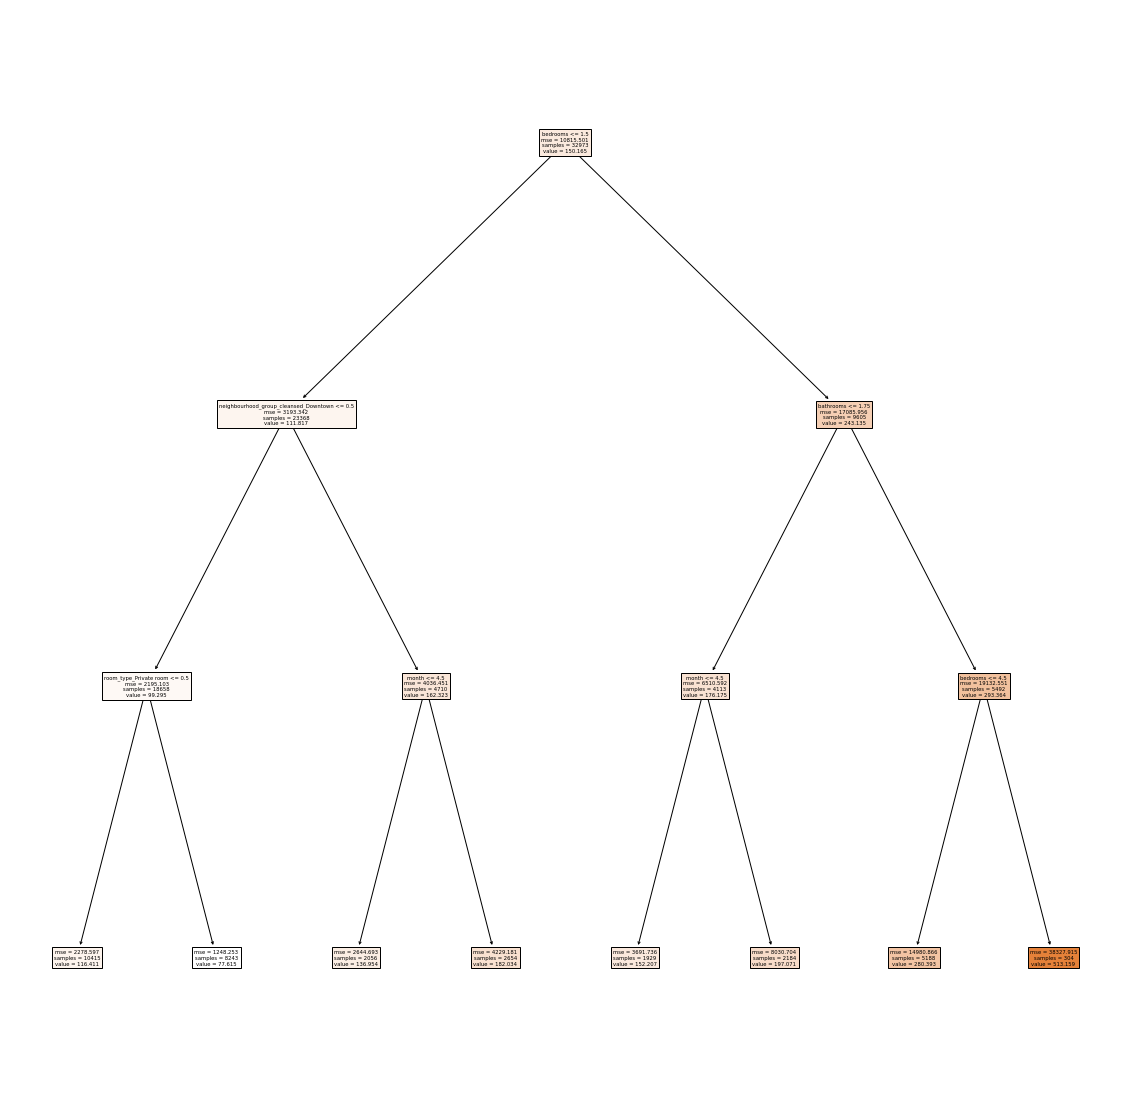

In [43]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(estimator, feature_names=X.columns, filled=True)

from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(estimator,
                   feature_names=X.columns,
                   filled=True)

In [44]:
#prepare train and test datasets for modelling
drops=["price_y","listing_id"]
X = df.drop(drops,axis=1)
y = df[['price_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=50, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,verbose=0)
forest.fit(X_train, y_train.squeeze())


#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 557.011, test: 1145.336
Random Forest R^2 train: 0.950, test: 0.900


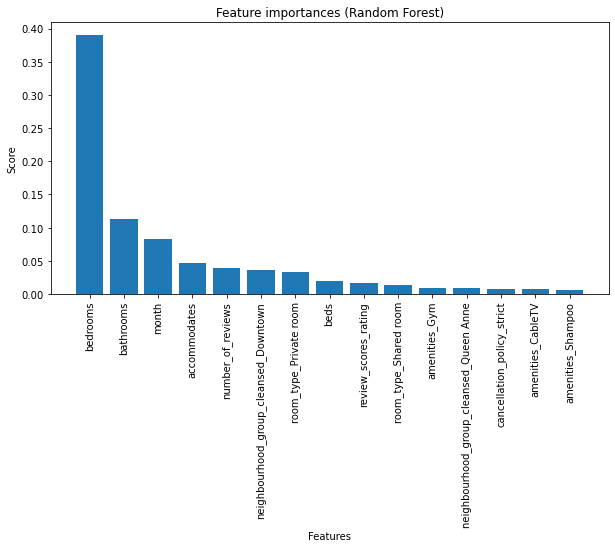

In [45]:

#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center')
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')
plt.savefig('./feature importances.png')
plt.show()

In [46]:
#prepare train and test datasets for modelling
drops=["price_y","listing_id"]
X = df.drop(drops,axis=1)
y = df[['price_y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=50, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1,
                               verbose=0)
forest.fit(X, y)


#calculate scores for the model
y_pred = forest.predict(X)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

<ipython-input-46-adb560fe6ef4>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X, y)


Random Forest MSE train: 557.011, test: 1145.336
Random Forest R^2 train: 0.950, test: 0.900


In [47]:
df['price_prediction'] = y_pred

In [48]:
df["perc_diff_%"]=(df["price_y"]-df["price_prediction"])/df["price_y"]*100
df["potential_value"]=df.apply(lambda row: 0.0 if row['perc_diff_%']>0 else "Potential Value", axis=1)

In [49]:
df.head()

listing_id  accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0      241032             4        1.0       1.0   1.0                207   
1      241032             4        1.0       1.0   1.0                207   
2      241032             4        1.0       1.0   1.0                207   
3      241032             4        1.0       1.0   1.0                207   
4      241032             4        1.0       1.0   1.0                207   

   review_scores_rating  price_y  month  amenities_24-HourCheck-in  \
0                  95.0     85.0      1                          0   
1                  95.0     85.0      2                          0   
2                  95.0     85.0      3                          0   
3                  95.0     85.0      4                          0   
4                  95.0     85.0      5                          0   

   amenities_AirConditioning  amenities_Breakfast  \
0                          1                    0   
1                          1                    0   
2                          1                    0   
3                          1                    0   
4                          1                    0   

   amenities_Buzzer/WirelessIntercom  amenities_CableTV  \
0                                  0                  1   
1                                  0                  1   
2                                  0                  1   
3                                  0                  1   
4                                  0                  1   

   amenities_CarbonMonoxideDetector  amenities_Cat(s)  amenities_Dog(s)  \
0                                 0                 0                 0   
1                                 0                 0                 0   
2                                 0                 0                 0   
3                                 0                 0                 0   
4                                 0                 0                 0   

   amenities_Doorman  amenities_Dryer  amenities_ElevatorinBuilding  \
0                  0                1                             0   
1                  0                1                             0   
2                  0                1                             0   
3                  0                1                             0   
4                  0                1                             0   

   amenities_Essentials  amenities_Family/KidFriendly  \
0                     0                             1   
1                     0                             1   
2                     0                             1   
3                     0                             1   
4                     0                             1   

   amenities_FireExtinguisher  amenities_FirstAidKit  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   amenities_FreeParkingonPremises  amenities_Gym  amenities_HairDryer  \
0                                0              0                    0   
1                                0              0                    0   
2                                0              0                    0   
3                                0              0                    0   
4                                0              0                    0   

   amenities_Hangers  amenities_Heating  amenities_HotTub  \
0                  0                  1                 0   
1                  0                  1                 0   
2                  0                  1                 0   
3                  0                  1                 0   
4                  0                  1                 0   

   amenities_IndoorFireplace  amenities_Internet  amenities_Iron  \
0      

df[["listing_id","price_y","y_prediction","perc_diff_%","potential_value"]].tail(10)

In [50]:
df_calendar_ori.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [51]:
dollar_cols=["price"]
  
dollartofloat(df_calendar_ori,dollar_cols)
df_calendar_ori.head()

listing_id        date available  price
0      241032  2016-01-04         t   85.0
1      241032  2016-01-05         t   85.0
2      241032  2016-01-06         f    NaN
3      241032  2016-01-07         f    NaN
4      241032  2016-01-08         f    NaN

In [52]:
threshold=-180

df_short=df[df["perc_diff_%"]<threshold]
df_short.head()

listing_id  accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
24571     6316917             4        1.0       1.0   1.0                 35   
47163     4711069            12        3.0       4.0   4.0                 42   

       review_scores_rating  price_y  month  amenities_24-HourCheck-in  \
24571                  94.0     12.0      1                          0   
47163                  91.0     10.0     11                          1   

       amenities_AirConditioning  amenities_Breakfast  \
24571                          0                    0   
47163                          0                    0   

       amenities_Buzzer/WirelessIntercom  amenities_CableTV  \
24571                                  1                  0   
47163                                  1                  1   

       amenities_CarbonMonoxideDetector  amenities_Cat(s)  amenities_Dog(s)  \
24571                                 1                 1                 1   
47163                                 1                 0                 0   

       amenities_Doorman  amenities_Dryer  amenities_ElevatorinBuilding  \
24571                  0                1                             1   
47163                  0                1                             0   

       amenities_Essentials  amenities_Family/KidFriendly  \
24571                     1                             1   
47163                     1                             1   

       amenities_FireExtinguisher  amenities_FirstAidKit  \
24571                           1                      1   
47163                           1                      1   

       amenities_FreeParkingonPremises  amenities_Gym  amenities_HairDryer  \
24571                                0              1                    0   
47163                                1              0                    1   

       amenities_Hangers  amenities_Heating  amenities_HotTub  \
24571                  0                  1                 0   
47163                  1                  1                 1   

       amenities_IndoorFireplace  amenities_Internet  amenities_Iron  \
24571                          0                   1               0   
47163                          1                   1               1   

       amenities_Kitchen  amenities_LaptopFriendlyWorkspace  \
24571                  1                                  0   
47163                  1                                  1   

       amenities_LockonBedroomDoor  amenities_Otherpet(s)  \
24571                            0                      0   
47163                            0                      0   

       amenities_PetsAllowed  amenities_Petsliveonthisproperty  \
24571                      0                                 1   
47163                      0                                 0   

       amenities_Pool  amenities_SafetyCard  amenities_Shampoo  \
24571               0                     1                  1   
47163               0                     0                  1   

       amenities_SmokeDetector  amenities_SmokingAllowed  \
24571                        1                         0   
47163                        1                         0   

       amenities_SuitableforEvents  amenities_TV  amenities_Washer  \
24571                            0             1                 1   
47163                            0             1                 1   

       amenities_Washer/Dryer  amenities_WheelchairAccessible  \
24571                       0                               1   
47163                       0                               0   

       amenities_WirelessInternet  host_identity_verified_t  \
24571                           1                         1   
47163                           1                         1   

       host_identity_verified_nan  neighbourhood_group_cleansed_Beacon Hill  \
24571                           0                                       

In [53]:
df_short=df[df["perc_diff_%"]<threshold]

df_calendar_outlier=df_calendar_ori[(df_calendar_ori["listing_id"].isin(df_short["listing_id"])) & (df_calendar_ori["price"].isin(df_short["price_y"]))]

In [54]:
df_calendar_outlier.head(10)

listing_id        date available  price
460654     6316917  2016-01-28         t   12.0
803694     4711069  2016-11-28         t   10.0

In [55]:
df_join=df_short[["price_prediction","perc_diff_%","listing_id"]]
df3 = df_calendar_outlier.merge(df_join, on=["listing_id"], how='inner')

In [56]:
df3.head(20)

listing_id        date available  price  price_prediction  perc_diff_%
0     6316917  2016-01-28         t   12.0            108.21      -801.76
1     4711069  2016-11-28         t   10.0            106.72      -967.25